# 텐서플로 시작하기

상수 텐서와 변수

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


랜덤 텐서

In [6]:
x = tf.random.normal(shape=(3,1),mean=0., stddev=1.) # stddev: 표준편차
print(x)

tf.Tensor(
[[ 0.5126839 ]
 [ 0.58102983]
 [-0.500307  ]], shape=(3, 1), dtype=float32)


In [9]:
# 균일 분포에서 랜덤한 값들을 생성
# 딥러닝 모델을 초기화 하거나 랜덤한 텐서를 생성하는데 유용하게 사용
x = tf.random.uniform(shape=(3,1),minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.20663238]
 [0.5066521 ]
 [0.9504206 ]], shape=(3, 1), dtype=float32)


넘파이 배열에 값 할당하기

In [10]:
import numpy as np
x = np.ones(shape=(2,2))
x[0,0]=0.

In [11]:
x

array([[0., 1.],
       [1., 1.]])

In [12]:
# 텐서플로우 텐서에 값을 할당하지 못함 -> 변수를 만들려면 랜점 텐서와 같이 초깃값을 제공해야 함
# 안되는 코드 예시
x = tf.ones(shape=(2,2))
x[0,0]=0

TypeError: ignored

텐서플로 변수 만들기

In [13]:
#  tf.Variable은 수정가능한 상태를 관리하기 위한 클래스
import tensorflow as tf

v = tf.Variable(initial_value = tf.random.normal(shape=(3,1)))
print(v) # v는 베리어블 해줘야함

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.1203521],
       [0.5442256],
       [1.4523263]], dtype=float32)>


In [14]:
# 텐서플로 변수에 값 할당하려면 assign 사용
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [15]:
# 변수 일부에 값 할당할때도 assign 활용
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [16]:
# assign_add 사용하기 .복합기능 연산자 기능 :+= 와 동일
v.assign_add(tf.ones((3,1))) # 1을 더해줌

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

텐서 연산: 텐서플로에서 수학 계산하기

In [2]:
import tensorflow as tf
a = tf.ones((2,2))
b = tf.square(a) # 제곱계산
c = tf.sqrt(a)   # 제곱근 계산(루트)
d = b+c #원소별 연산
e = tf.matmul(a,b) #두텐서의 점곱을 계산

In [3]:
print(a)
print(b)
print(c)
print(d)
print(e)
e*=d #두 텐서를 곱한다( 원소별 연산 )
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


### GradientTape API 다시 살펴보기

**`GradientTape` 사용하기**
- GradientTape은 TensorFlow의 핵심 기능 중 하나로, 자동 미분을 수행하기 위해 사용되는 도구입니다.
- TensorFlow는 gradient(기울기)를 계산하는 데에 GradientTape을 활용하여 연산 과정을 기록

In [6]:
# 텐서플로우를 사용하여 변수 input_var(인풋 베리어블)의 제곱에 대한 그래디언트(기울기)를 계산
# result는 input_var의 제곱이므로, 이 미분값은 2* input_var가 됩니다.
# input_var의 초기값이 3 이므로, 그래디언트는 6

input_var = tf.Variable(initial_value=3.)

# tf.GradientTape() 를 사용하여 tf.GradientTape 컨텍스트를 생성.
# 이제부터 tape를 사용하여 연산 기록
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
# tape.gradient() 를 이용하여 result에 대한 input_var의 그래디언트를 계산한다.

In [7]:
gradient # 6이 나온다

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

상수 입력 텐서와 함께 gradientTape 사용하기

In [8]:
# 그래디언트를 계산하려면 미분 대상이 되는 텐서가 관찰 대싱으로 지정되어야 하는데 ,
# 텐서플로우 변수는 기본적으로 자동 관찰 대상이 됩니다.
# 그러나 상수나 일반 텐서는 그렇지 않기 떄문에. 이들에 대해 그래디언트를 계산하려면 먼저 tape.watch()함수를 사용하여
# 그 텐서를 관찰대상으로 지정.
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
# 상수를 미분하면 0이 되지만, 여기서 미분하는 것은 상수 자체가 아니라 상수 값을 가진 텐서에 대한 함수

In [9]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

#### 물리학에서 위치, 속도, 그리고 가속도는 서로 미분과 적분을 통해 연결
- 위치(position)는 시간에 대해 미분하면 속도(velocity)가 된다. 이는 위치가 시간에 따라 어떻게 변하는지를 나타내며, 이 변화율이 바로 속도이다. 즉, 위치의 그레디언트(미분값)는 속도이다.
- 속도를 시간에 대해 미분하면 가속도(acceleration)가 된다. 속도가 시간에 따라 어떻게 변하는지를 나타내며, 이 변화율이 바로 가속도이다. 즉, 속도의 그레디언트(미분값)는 가속도이다.
- 따라서, 위치의 두 번째 시간에 대한 미분값(이계도 그레디언트)은 가속도가 된다.

#### 그레이디언트 테이프를 중첩하여 이계도 그레이디언트를 계산하기
- TensorFlow를 사용하여 시간(time)에 따른 위치(position)와 속도(speed)의 변화를 모델링하고, 그에 대한 가속도(acceleration)를 계산하는 예시
- 첫 번째 줄에서는 TensorFlow 변수 time을 생성하고, 초기값을 0.0으로 설정.
- 두 번째 줄에서는 tf.GradientTape()를 사용하여 outer_tape라는 GradientTape 컨텍스트를 생성합니다. outer_tape를 사용하여 가속도에 대한 그래디언트를 계산.
- 세 번째 줄에서는 inner_tape라는 또 다른 GradientTape 컨텍스트를 생성합니다. inner_tape를 사용하여 위치에 대한 그래디언트를 계산.
- 네 번째 줄에서는 position 변수에 4.9 * time ** 2의 연산 결과를 할당합니다. 이 때, 이 연산은 inner_tape 컨텍스트 내에서 기록.
- 다섯 번째 줄에서는 inner_tape.gradient()를 사용하여 position에 대한 time의 그래디언트를 계산합니다. 이를 통해 위치에 대한 시간의 변화율, 즉 속도를 구한다.
- 여섯 번째 줄에서는 outer_tape.gradient()를 사용하여 speed에 대한 time의 그래디언트를 계산합니다. 이를 통해 속도에 대한 시간의 변화율, 즉 가속도를 구한다.

따라서 acceleration에는 time에 대한 speed의 그래디언트가 저장된다.
결과적으로, 이 코드는 시간에 따른 위치를 모델링하고, 이를 기반으로 속도와 가속도를 계산한다. time 변수의 값이 변할 때 위치, 속도 및 가속도의 변화율을 계산하여 모델을 업데이트할 수 있다.

In [11]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9*time**2                    # 위치: 시간에 따른 위치.
  speed = inner_tape.gradient(position, time) # 속도 = [위치]에 시간을 미분
acceleration = outer_tape.gradient(speed, time) # 가속도 = [속도]에 시간을 미분

In [12]:
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.8>

엔드 투 엔드 예제 : 텐서플로우 선형 분류기

2D평면에 두 클래스의 랜덤한 포인트 생성

In [16]:
import numpy as np
num_samples_per_calss = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_calss )
positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_calss
)


두 클래스를 (2000,2) 크기의 한 배열로 쌓기

In [18]:
# np.vstack() 함수는 주어진 배열들을 수직으로 쌓아 하나의 배열로 합친다.
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs

array([[-0.53910303,  1.8337283 ],
       [-0.92465615,  2.0331564 ],
       [-0.84786934,  1.6631321 ],
       ...,
       [ 4.9120097 , -0.4257319 ],
       [ 2.2320106 ,  0.39968798],
       [ 2.097508  ,  0.5751837 ]], dtype=float32)

(0과 1로 구성된) 타깃 생성하기

In [19]:
targets = np.vstack((np.zeros((num_samples_per_calss, 1), dtype="float32"), # 앞 1000개는 0
                     np.ones((num_samples_per_calss,1),dtype="float32")))   # 뒤에오는 1000개는 1읍 입력

In [21]:
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

두 클래스의 포인트를 그래프로 그리기

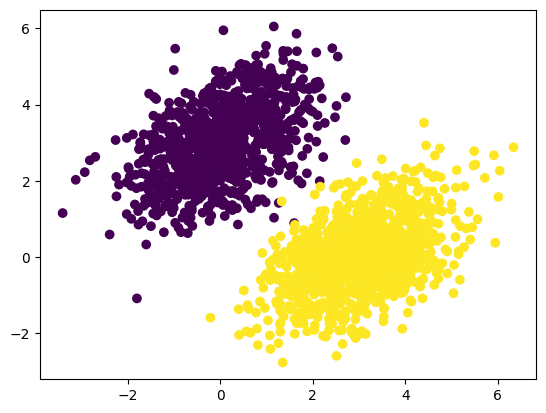

In [22]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:,1], c= targets[:,0])
# 전체 관측치를 0과 1로 나누어 출력하고 0에는 컬러를 부여함 = 나머지는 자동으로 다른 색 입력.
plt.show()

선형 분류기의 변수 만들기

In [24]:
input_dim = 2
output_dim = 1                                          # ↓2차원 , ↓ 1차원
W = tf.Variable(initial_value= tf.random.uniform(shape=(input_dim, output_dim))) # 가중치 만들기
b = tf.Variable(initial_value= tf.zeros(shape=(output_dim,))) #바이어스 만들기 ->초기값은 0
                                                #↑1차원

In [25]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

In [26]:
#정방향 패스 함수 ( 선형변환 )
def model(inputs):
  return tf.matmul(input,W)+b

In [27]:
#평균 제곱 오차 손실 함수
# 원래 활성함수 적용 뒤에 해야하지만 이번에는 생략하고 진행.

def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets-predictions) # 각 샘플의 손실값을 담아준다
  return tf.reduse_mean(per_sample_losses) #평균 구해줌. 샘플당 손실값을 하나의 스칼라 손실값으로 평균함

훈련 스텝 함수

In [28]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape: # ★ 연산과정 기록. 그래디언트를 계속 업데이트하여 손실을 최소화 해주는 역할을 함.
    predictions = model(inputs) # 선형변환해서 예측
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

In [29]:
# 배치 훈련 루프

for step in range(40):
  loss = training_step(inputs, targets)
  print(f"{step}번째 스텝의 손실: {loss:.4f}")
# step이 진행 될 때마다 loss가 기록됨
# = 40번째에서 loss,.가 가장 작아짐


ValueError: ignored